In [1]:
import pandas as pd
import re
import scipy.stats as st
import matplotlib.pyplot as plt

In [2]:
df_jjj = pd.read_csv("../Resource/jjj_data.csv", sep='\t')

# to add position of the year
df_jjj["position of year"] = 0
current_year = 0
current_pos = 1
for index, row in df_jjj.iterrows():
    if current_year != row["year"]:
        current_year = row["year"]
        current_pos = 1
    else:
        current_pos = current_pos + 1
    df_jjj.at[index, "position of year"] = current_pos

df_jjj = df_jjj.reset_index()

df_jjj_rename = df_jjj.copy()

# define how many letters to match
search_len = 5

# use regex to leave all letters only
regex = re.compile('[^a-zA-Z]')

df_jjj_rename["title"] = df_jjj_rename.apply(lambda x: regex.sub("", x.title), axis=1)
df_jjj_rename["title"] = df_jjj_rename["title"].str.upper()

df_jjj_rename["artist"] = df_jjj_rename.apply(lambda x: regex.sub("", x.artist), axis=1)
df_jjj_rename["artist"] = df_jjj_rename["artist"].str.upper()

# get the left {search_len} chars, for less than {search_len}, pad some '.' at right
df_jjj_rename["artist_s"] = df_jjj_rename["artist"].str[:search_len].str.pad(search_len, side="right", fillchar=".")
df_jjj_rename["title_s"] = df_jjj_rename["title"].str[:search_len].str.pad(search_len, side="right", fillchar=".")

#df_jjj_rename["artist_s"] = df_jjj_rename["artist"].str[:search_len]
#df_jjj_rename["title_s"] = df_jjj_rename["title"].str[:search_len]

df_jjj_rename
df_jjj

#df_jjj_rename.groupby(["year"]).count()

,index,year,title,artist,duration,country,position of year
0,0,1993,Asshole,Denis Leary,4:26,USA,1
1,1,1993,Creep,Radiohead,3:56,England,2
2,2,1993,Linger,The Cranberries,4:35,Ireland,3
3,3,1993,No Rain,Blind Melon,3:37,USA,4
4,4,1993,Cannonball,The Breeders,3:34,USA,5
...,...,...,...,...,...,...,...
2496,2496,2017,Chasin',Cub Sport,3:11,Australia,96
2497,2497,2017,LOYALTY. (feat. Rihanna),Kendrick Lamar,3:47,USA,97
2498,2498,2017,Snow,Angus & Julia Stone,4:12,Australia,98
2499,2499,2017,Arty Boy (feat. Emma Louise),Flight Facilities,3:52,Australia,99


In [3]:
df_spotify = pd.read_csv("../Resource/spotify_data.csv", encoding="utf-8" )
df_spotify = df_spotify.reset_index()
#for index, row in df_spotify.iterrows():
#    if len(row["release_date"]) == 4:
#        df_spotify.at[index, "release_date"] = row["release_date"] + "-01-01"
#    elif len(row["release_date"]) == 7:
#        df_spotify.at[index, "release_date"] = row["release_date"] + "-01"
df_spotify = df_spotify[["index", "name", "artists", "year", "release_date", "duration_ms", "valence", "danceability", "speechiness"]]
df_spotify.head()

,index,name,artists,year,release_date,duration_ms,valence,danceability,speechiness
0,0,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...","['Sergei Rachmaninoff', 'James Levine', 'Berli...",1921,1921,831667,0.0594,0.279,0.0366
1,1,Clancy Lowered the Boom,['Dennis Day'],1921,1921,180533,0.9630,0.819,0.4150
2,2,Gati Bali,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,1921,1921,500062,0.0394,0.328,0.0339
3,3,Danny Boy,['Frank Parker'],1921,1921,210000,0.1650,0.275,0.0354
4,4,When Irish Eyes Are Smiling,['Phil Regan'],1921,1921,166693,0.2530,0.418,0.0380


In [4]:
# do the samething as df_jjj_rename
df_spotify_rename = df_spotify.copy()

err_index = []

# df_spotify_rename["name"] = df_spotify_rename.apply(lambda x: regex.sub("", x.name), axis=1)
# use above line with trigger exception, have no idea why 

for index, row in df_spotify_rename.iterrows():
    try:
        df_spotify_rename.at[index, "name"] = regex.sub("", df_spotify_rename.at[index, "name"])
    except:
        err_index.append(index)

df_spotify_rename["name"] = df_spotify_rename["name"].str.upper()

df_spotify_rename["artists"] = df_spotify_rename.apply(lambda x: regex.sub("", x.artists), axis=1)
df_spotify_rename["artists"] = df_spotify_rename["artists"].str.upper()

df_spotify_rename["name_s"] = df_spotify_rename["name"].str[:search_len].str.pad(search_len, side="right", fillchar=".")
df_spotify_rename["artists_s"] = df_spotify_rename["artists"].str[:search_len].str.pad(search_len, side="right", fillchar=".")

In [5]:
df_spotify_rename

,index,name,artists,year,release_date,duration_ms,valence,danceability,speechiness,name_s,artists_s
0,0,PIANOCONCERTONOINDMINOROPIIIFINALEALLABREVE,SERGEIRACHMANINOFFJAMESLEVINEBERLINERPHILHARMO...,1921,1921,831667,0.0594,0.279,0.0366,PIANO,SERGE
1,1,CLANCYLOWEREDTHEBOOM,DENNISDAY,1921,1921,180533,0.9630,0.819,0.4150,CLANC,DENNI
2,2,GATIBALI,KHPKRIDHAMARDAWAKARATONNGAYOGYAKARTAHADININGRAT,1921,1921,500062,0.0394,0.328,0.0339,GATIB,KHPKR
3,3,DANNYBOY,FRANKPARKER,1921,1921,210000,0.1650,0.275,0.0354,DANNY,FRANK
4,4,WHENIRISHEYESARESMILING,PHILREGAN,1921,1921,166693,0.2530,0.418,0.0380,WHENI,PHILR
...,...,...,...,...,...,...,...,...,...,...,...
170660,170660,ONECROWDEDHOUR,AUGIEMARCH,2006,2006-03-27,256000,0.3650,0.413,0.0330,ONECR,AUGIE
170661,170661,BLACKFINGERNAILSREDWINE,ESKIMOJOE,2006,2006-06-10,250000,0.4330,0.553,0.0424,BLACK,ESKIM
170662,170662,THEHARDROAD,HILLTOPHOODS,2006,2006-04-06,246000,0.9610,0.767,0.1110,THEHA,HILLT
170663,170663,HOOPS,THERUBENS,2015,2015-07-24,159000,0.8020,0.731,0.0339,HOOPS,THERU


In [6]:
# merge by ["title_4","artist_4"] and ["name_4", "artists_4"]
df_title_artist = df_jjj_rename.merge(df_spotify_rename, left_on=["title_s","artist_s"], right_on=["name_s", "artists_s"], how="inner")

# merge by "title_4" only
df_title_only = df_jjj_rename.merge(df_spotify_rename, left_on=["title_s"], right_on=["name_s"], how="inner")

# choose one of the above for later processing
index_df_good = df_title_artist[["index_x","index_y", "year_x","year_y", "title", "name", "title_s", "name_s", "artist", "artists", "artist_s", "artists_s"]]
# index_df_good = df_title_artist[["index_x","index_y", "year_x","year_y", "title", "name", "title_4", "name_4", "artist", "artists"]]

# filter by year compare (results less than merge by ["title_4","artist_4"] and ["name_4", "artists_4"])
# df_title_artist_year = df_title_artist.loc[(df_title_artist["year_x"] >= df_title_artist["year_y"]) & (df_title_artist["year_x"] - df_title_artist["year_y"] <=10)]
# index_df_good = df_title_artist_year[["index_x","index_y", "year_x","year_y", "title", "name", "title_4", "name_4", "artist", "artists"]]

#index_df_good
index_df_good

,index_x,index_y,year_x,year_y,title,name,title_s,name_s,artist,artists,artist_s,artists_s
0,0,51827,1993,1993,ASSHOLE,ASSHOLE,ASSHO,ASSHO,DENISLEARY,DENISLEARY,DENIS,DENIS
1,1,14206,1993,1993,CREEP,CREEP,CREEP,CREEP,RADIOHEAD,RADIOHEAD,RADIO,RADIO
2,1,103206,1993,1992,CREEP,CREEP,CREEP,CREEP,RADIOHEAD,RADIOHEAD,RADIO,RADIO
3,2,14213,1993,1993,LINGER,LINGER,LINGE,LINGE,THECRANBERRIES,THECRANBERRIES,THECR,THECR
4,2,121243,1993,2002,LINGER,LINGER,LINGE,LINGE,THECRANBERRIES,THECRANBERRIES,THECR,THECR
...,...,...,...,...,...,...,...,...,...,...,...,...
1499,2495,19078,2017,2017,MASKOFF,MASKOFF,MASKO,MASKO,FUTURE,FUTURE,FUTUR,FUTUR
1500,2495,91745,2017,2017,MASKOFF,MASKOFFFEATKENDRICKLAMARREMIX,MASKO,MASKO,FUTURE,FUTUREKENDRICKLAMAR,FUTUR,FUTUR
1501,2495,140196,2017,2017,MASKOFF,MASKOFFMARSHMELLOREMIX,MASKO,MASKO,FUTURE,FUTUREMARSHMELLO,FUTUR,FUTUR
1502,2497,37843,2017,2017,LOYALTYFEATRIHANNA,LOYALTYFEATRIHANNA,LOYAL,LOYAL,KENDRICKLAMAR,KENDRICKLAMARRIHANNA,KENDR,KENDR


In [7]:
# get the jjj unique index in the merged dataframe
index_jjj = index_df_good.drop_duplicates(subset=["index_x"], keep="first")
index_jjj


final_df = index_jjj[["index_x","index_y"]]
final_df.columns=["index_jjj", "index_spotify"]
final_df = final_df.merge(df_jjj, left_on="index_jjj", right_on="index", how="inner")
final_df = final_df.merge(df_spotify, left_on="index_spotify", right_on="index", how="inner")
#df.drop(df.columns[i], axis=1)
#final_df = final_df.drop(final_df.columns[0:2], axis=1)
final_df = final_df.drop(columns=["index_x", "index_y"])
final_df

,index_jjj,index_spotify,year_x,title,artist,duration,country,position of year,name,artists,year_y,release_date,duration_ms,valence,danceability,speechiness
0,0,51827,1993,Asshole,Denis Leary,4:26,USA,1,Asshole,['Denis Leary'],1993,1993-01-01,266173,0.649,0.378,0.2490
1,1,14206,1993,Creep,Radiohead,3:56,England,2,Creep,['Radiohead'],1993,1993-02-22,238640,0.104,0.515,0.0369
2,2,14213,1993,Linger,The Cranberries,4:35,Ireland,3,Linger,['The Cranberries'],1993,1993-03-01,274707,0.204,0.439,0.0265
3,3,14009,1993,No Rain,Blind Melon,3:37,USA,4,No Rain,['Blind Melon'],1992,1992-01-01,217107,0.566,0.389,0.0316
4,4,14248,1993,Cannonball,The Breeders,3:34,USA,5,Cannonball,['The Breeders'],1993,1993-08-30,213693,0.729,0.502,0.0407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1143,2487,169869,2017,The Way You Used To Do,Queens Of The Stone Age,4:34,USA,87,The Way You Used to Do,['Queens of the Stone Age'],2017,2017-08-25,274282,0.433,0.474,0.2720
1144,2492,19024,2017,LOVE. (feat. Zacari),Kendrick Lamar,3:33,USA,92,LOVE. FEAT. ZACARI.,"['Kendrick Lamar', 'Zacari']",2017,2017-04-14,213400,0.779,0.800,0.0924
1145,2495,19078,2017,Mask Off,Future,3:24,USA,95,Mask Off,['Future'],2017,2017-06-30,204600,0.281,0.833,0.4310
1146,2497,37843,2017,LOYALTY. (feat. Rihanna),Kendrick Lamar,3:47,USA,97,LOYALTY. FEAT. RIHANNA.,"['Kendrick Lamar', 'Rihanna']",2017,2017-04-14,227360,0.419,0.658,0.0573


In [8]:
# songs missing
missing_df = df_jjj.loc[~df_jjj["index"].isin(final_df["index_jjj"])]
missing_dict = {}
for x in missing_df["year"].unique():
    missing_dict[str(x)] = missing_df.loc[missing_df["year"] == x][["position of year"]]

# columns definition
Instrumentalness:
    This value represents the amount of vocals in the song. The closer it is to 1.0, the more instrumental the song is.
    
Acousticness:
    This value describes how acoustic a song is. A score of 1.0 means the song is most likely to be an acoustic one.
    
Liveness:
    This value describes the probability that the song was recorded with a live audience. According to the official documentation “a value above 0.8 provides strong likelihood that the track is live".

Speechiness:
    "Speechiness detects the presence of spoken words in a track". If the speechiness of a song is above 0.66, it is probably made of spoken words, a score between 0.33 and 0.66 is a song that may contain both music and words, and a score below 0.33 means the song does not have any speech.

Energy:
    "(energy) represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy".

Danceability:
    "Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable".

Valence: 
    "A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)".

# Hypothesis 1
What makes a Triple J winner? Mashing data between Spotify and Triple J databases for 1993 to 2017. Get technical/numerical information for each song based on Spotify analytics. Compare some key elements in all triple j winners to determine commonalities – For example: Liveness, loudness, danceability.
Educated guess: Winners of top 100 will show low danceability, high liveness. 
Compare mean danceability (and other relevant variables (valence, danceability etc.)) in Triple J winners to population mean for these variables using a single sample t-test to determine which, if any, variables are relevant in the creation of a Triple J winner.


In [9]:
# To show Triple J mean danceability, valence, and speechiness
hpt1_df = final_df.groupby("year_x").agg({
    "danceability" : "mean",
#    "liveness" : "mean",
    "valence" : "mean",
    "speechiness" : "mean"
})
hpt1_df

,danceability,valence,speechiness
year_x,,,
1993,0.542483,0.529517,0.071672
1994,0.497500,0.564434,0.057919
1995,0.494759,0.488837,0.073867
1996,0.499958,0.501604,0.062908
1997,0.548304,0.577018,0.074793
1998,0.560816,0.520686,0.073986
1999,0.557000,0.550891,0.056826
2000,0.492667,0.523944,0.068104
2001,0.540020,0.531859,0.077796


Text(0.5, 0, 'Year')

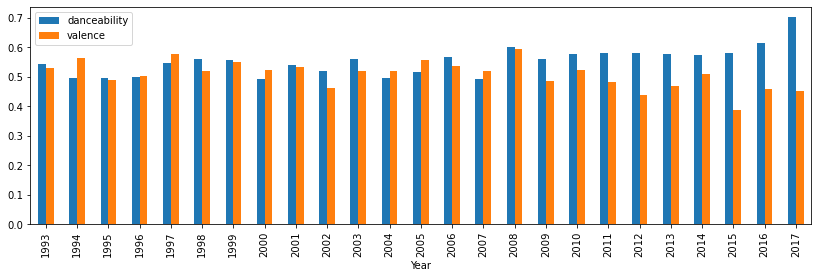

In [10]:
# To show Triple J mean danceability, valence
ax = hpt1_df.plot.bar(y=["danceability", "valence"],figsize=(14,4))
ax.set_xlabel("Year")

In [11]:
# make sure the 1st place song of each year are in the merge data
top_pos = final_df.groupby("year_x")[["position of year"]].min()

# add column top pos to indicate the top pos in the year to compare the track pos of year
top_tracks = final_df.loc[final_df["position of year"] == 1]

# if not all the 1st place are in the dataset, use the min position as the 1st place
# top_jjj["top pos"] = 0
# for index, row in top_jjj.iterrows():
#    year = row["year_x"]
#    top_jjj.at[index,"top pos"] = top_pos.at[year, "position of year"]

#top_tracks = top_jjj.loc[top_jjj["position of year"] == top_jjj["top pos"]]
top_tracks = top_tracks.set_index(["year_x"])
top_tracks = top_tracks[["danceability", "valence"]]
top_tracks.head()

# top_pos

,danceability,valence
year_x,,
1993,0.378,0.649
1994,0.307,0.304
1995,0.410,0.456
1996,0.485,0.974
1997,0.363,0.644


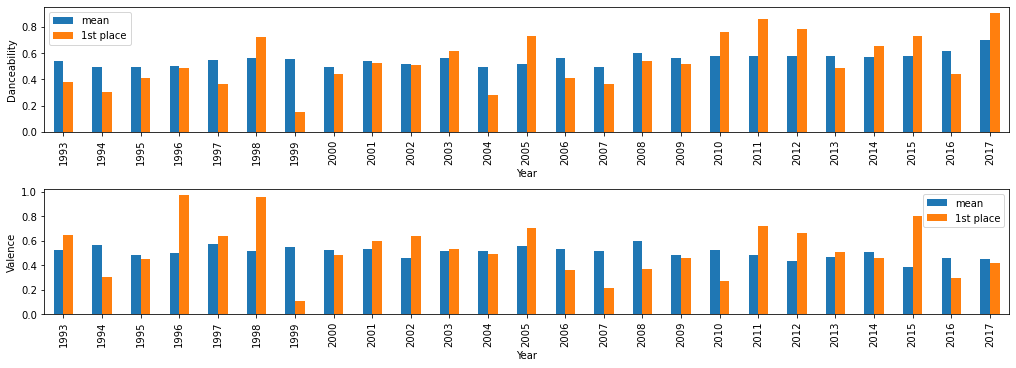

In [12]:
hpt1_merge = hpt1_df.merge(top_tracks, left_index=True, right_index=True, suffixes=('', 'top'))
fig, (ax1, ax2) = plt.subplots(2,1, constrained_layout = True, figsize=(14,5))
hpt1_merge.plot.bar(y=["danceability", "danceabilitytop"], ax=ax1)
hpt1_merge.plot.bar(y=["valence", "valencetop"], ax=ax2)
ax1.set_xlabel("Year")
ax2.set_xlabel("Year")
ax1.set_ylabel("Danceability")
ax2.set_ylabel("Valence")
ax1.legend(["mean", "1st place"])
ax2.legend(["mean", "1st place"])

In [13]:
# ttest for use 1st place songs as sample and final_df as population
samples = final_df.loc[final_df["position of year"] == 1]
danceability_mean = final_df["danceability"].mean()
valence_mean = final_df["valence"].mean()
ttest_danc = st.ttest_1samp(samples["danceability"], danceability_mean)
ttest_valence = st.ttest_1samp(samples["valence"], valence_mean)
print(ttest_danc)
print(ttest_valence)

Ttest_1sampResult(statistic=-0.3738255644108302, pvalue=0.7118162360398539)
Ttest_1sampResult(statistic=0.32141827910647613, pvalue=0.7506759443702136)


# Hypothesis 2
What is the perfect time to release a hit? Using the release date informed by Spotify, we can find what are the most common release dates for the winners? Hypothesis: perfect launch date is March to June, as it takes a few months for people to get to know a song and start liking it enough to vote for it. By grouping months into yearly quarters and using a chi squared test after establishing the frequency at which Triple J winners’ release date falls into each quarter the time of year where winners are more likely to arise might be ascertained if there is such a time. A comparison to the population song release distribution will also indicate that if there is a statistically significant result that it is not due to a simple increase in the volume of songs released at that time of year. 

In [14]:
#Test of when Hottest 100 songs are released
# Jan-Mar as Qtr 1 
hpt2_df = final_df.copy()

#for index, row in hpt2_df.iterrows():
#    if len(row["release_date"]) == 4:
#        hpt2_df.at[index, "release_date"] = "01/01/" + row["release_date"]

#hpt2_df.loc[hpt2_df["release_date"].str.len() < 8]
#hpt2_df["left"] = hpt2_df["release_date"].str.find("/")
#hpt2_df["right"] = hpt2_df["release_date"].str.rfind("/")
#
#hpt2_df.loc[hpt2_df["left"] == 1]

bins=[0,3,6,9,12]
labels = [1,2,3,4]
hpt2_df["quarter"] = pd.cut(pd.to_numeric(hpt2_df["release_date"].str[5:7]),bins=bins,labels=labels)

In [15]:
hpt2_df

,index_jjj,index_spotify,year_x,title,artist,duration,country,position of year,name,artists,year_y,release_date,duration_ms,valence,danceability,speechiness,quarter
0,0,51827,1993,Asshole,Denis Leary,4:26,USA,1,Asshole,['Denis Leary'],1993,1993-01-01,266173,0.649,0.378,0.2490,1
1,1,14206,1993,Creep,Radiohead,3:56,England,2,Creep,['Radiohead'],1993,1993-02-22,238640,0.104,0.515,0.0369,1
2,2,14213,1993,Linger,The Cranberries,4:35,Ireland,3,Linger,['The Cranberries'],1993,1993-03-01,274707,0.204,0.439,0.0265,1
3,3,14009,1993,No Rain,Blind Melon,3:37,USA,4,No Rain,['Blind Melon'],1992,1992-01-01,217107,0.566,0.389,0.0316,1
4,4,14248,1993,Cannonball,The Breeders,3:34,USA,5,Cannonball,['The Breeders'],1993,1993-08-30,213693,0.729,0.502,0.0407,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1143,2487,169869,2017,The Way You Used To Do,Queens Of The Stone Age,4:34,USA,87,The Way You Used to Do,['Queens of the Stone Age'],2017,2017-08-25,274282,0.433,0.474,0.2720,3
1144,2492,19024,2017,LOVE. (feat. Zacari),Kendrick Lamar,3:33,USA,92,LOVE. FEAT. ZACARI.,"['Kendrick Lamar', 'Zacari']",2017,2017-04-14,213400,0.779,0.800,0.0924,2
1145,2495,19078,2017,Mask Off,Future,3:24,USA,95,Mask Off,['Future'],2017,2017-06-30,204600,0.281,0.833,0.4310,2
1146,2497,37843,2017,LOYALTY. (feat. Rihanna),Kendrick Lamar,3:47,USA,97,LOYALTY. FEAT. RIHANNA.,"['Kendrick Lamar', 'Rihanna']",2017,2017-04-14,227360,0.419,0.658,0.0573,2


Text(0, 0.5, '')

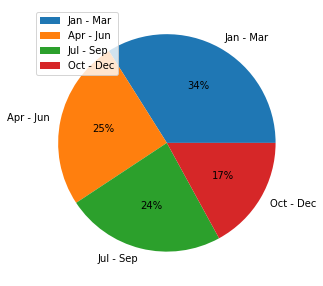

In [16]:
hpt2_df_qtr = hpt2_df.groupby(["quarter"])[["title"]].count()
hpt2_df_qtr.index = ["Jan - Mar", "Apr - Jun", "Jul - Sep", "Oct - Dec"]
ax = hpt2_df_qtr.plot.pie(y="title", figsize = (10,5), autopct='%1.0f%%')
ax.legend(loc="upper left")
ax.set_ylabel("")

In [17]:
total_songs = hpt2_df["title"].count()
hpt2_df_qtr["expected"] = total_songs / 4
hpt2_df_qtr

,title,expected
Jan - Mar,347,287.0
Apr - Jun,259,287.0
Jul - Sep,242,287.0
Oct - Dec,174,287.0


In [18]:
chi_test = st.chisquare(hpt2_df_qtr["title"], hpt2_df_qtr["expected"])
chi_test

Power_divergenceResult(statistic=66.82229965156795, pvalue=2.044005374895182e-14)

In [19]:
#Test of when winners only are released
hpt2_winners_df = hpt2_df[hpt2_df["position of year"] == 1]
hpt2_winners_df["quarter"] = pd.cut(pd.to_numeric(final_df["release_date"].str[5:7]),bins=bins,labels=labels)
hpt2_winners_df

<ipython-input-19-6b1c064b0250>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hpt2_winners_df["quarter"] = pd.cut(pd.to_numeric(final_df["release_date"].str[5:7]),bins=bins,labels=labels)


,index_jjj,index_spotify,year_x,title,artist,duration,country,position of year,name,artists,year_y,release_date,duration_ms,valence,danceability,speechiness,quarter
0,0,51827,1993,Asshole,Denis Leary,4:26,USA,1,Asshole,['Denis Leary'],1993,1993-01-01,266173,0.649,0.378,0.2490,1
59,100,14410,1994,Zombie,The Cranberries,5:06,Ireland,1,Zombie,['The Cranberries'],1994,1994-10-03,306427,0.304,0.307,0.0339,4
118,200,14606,1995,Wonderwall,Oasis,4:19,England,1,Wonderwall,['Oasis'],1995,1995-10-02,258907,0.456,0.410,0.0366,4
171,300,170653,1996,Buy Me A Pony,Spiderbait,1:44,Australia,1,Buy Me A Pony,['Spiderbait'],1996,1996-09-16,104000,0.974,0.485,0.0410,3
220,400,170654,1997,No Aphrodisiac,The Whitlams,4:20,Australia,1,No Aphrodisiac,['The Whitlams'],1997,1997-12-14,260000,0.644,0.363,0.0422,4
275,500,15241,1998,Pretty Fly (For A White Guy),The Offspring,3:09,USA,1,Pretty Fly (For A White Guy),['The Offspring'],1998,1998-11-16,188667,0.963,0.723,0.1020,4
324,600,170655,1999,These Days,Powderfinger,4:15,Australia,1,These Days,['Powderfinger'],1999,1999-08-09,255000,0.105,0.150,0.0343,3
371,700,104786,2000,My Happiness,Powderfinger,4:37,Australia,1,My Happiness,['Powderfinger'],2000,2000-01-01,276627,0.487,0.445,0.0302,1
419,800,170658,2001,Amazing,Alex Lloyd,3:23,Australia,1,Amazing,['Alex Lloyd'],2001,2001-09-17,203000,0.600,0.527,0.0303,3
470,900,16038,2002,No One Knows,Queens Of The Stone Age,4:39,USA,1,No One Knows,['Queens of the Stone Age'],2002,2002,278707,0.637,0.507,0.0641,NaN


Text(0, 0.5, '')

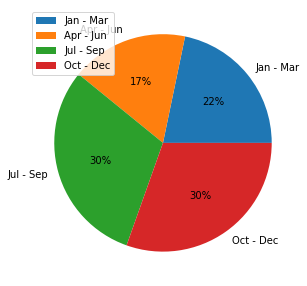

In [20]:
hpt2_winners_df_qtr = hpt2_winners_df.groupby(["quarter"])[["title"]].count()
hpt2_winners_df_qtr.index = ["Jan - Mar", "Apr - Jun", "Jul - Sep", "Oct - Dec"]
ax1 = hpt2_winners_df_qtr.plot.pie(y="title", figsize = (10,5), autopct='%1.0f%%')
ax1.legend(loc="upper left")
ax1.set_ylabel("")

In [21]:
total_songs1 = hpt2_winners_df["title"].count()
hpt2_winners_df_qtr["expected"] = total_songs1 / 4
hpt2_winners_df_qtr


,title,expected
Jan - Mar,5,6.25
Apr - Jun,4,6.25
Jul - Sep,7,6.25
Oct - Dec,7,6.25


In [22]:
chi_test = st.chisquare(hpt2_winners_df_qtr["title"], hpt2_winners_df_qtr["expected"])
chi_test

Power_divergenceResult(statistic=1.2400000000000002, pvalue=0.7434275021945493)

In [23]:
#Test of when all songs are released
hpt2_spotify_df = df_spotify.copy()
hpt2_spotify_df = hpt2_spotify_df[hpt2_spotify_df["year"] > 1992]
hpt2_spotify_df["quarter"] = pd.cut(pd.to_numeric(hpt2_spotify_df["release_date"].str[5:7]),bins=bins,labels=labels)
hpt2_spotify_df

,index,name,artists,year,release_date,duration_ms,valence,danceability,speechiness,quarter
14206,14206,Creep,['Radiohead'],1993,1993-02-22,238640,0.104,0.515,0.0369,1
14207,14207,Mr. Jones,['Counting Crows'],1993,1993-01-01,272293,0.726,0.578,0.0363,1
14208,14208,Heart-Shaped Box,['Nirvana'],1993,1993-09-21,281160,0.382,0.256,0.0552,3
14209,14209,Gin N Juice (feat. Dat Nigga Daz),"['Snoop Dogg', 'Daz Dillinger']",1993,1993,211493,0.346,0.549,0.1880,NaN
14210,14210,C.R.E.A.M.,['Wu-Tang Clan'],1993,1993-11-09,252187,0.576,0.479,0.3730,4
...,...,...,...,...,...,...,...,...,...,...
170660,170660,One Crowded Hour,['Augie March'],2006,2006-03-27,256000,0.365,0.413,0.0330,1
170661,170661,"Black Fingernails, Red Wine",['Eskimo Joe'],2006,2006-06-10,250000,0.433,0.553,0.0424,2
170662,170662,The Hard Road,['Hilltop Hoods'],2006,2006-04-06,246000,0.961,0.767,0.1110,2
170663,170663,Hoops,['The Rubens'],2015,2015-07-24,159000,0.802,0.731,0.0339,3


Text(0, 0.5, '')

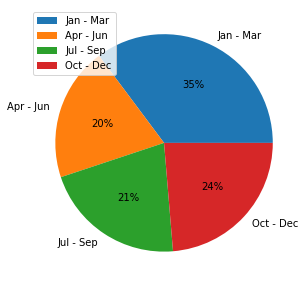

In [24]:
hpt2_spotify_df_qtr = hpt2_spotify_df.groupby(["quarter"])[["name"]].count()
hpt2_spotify_df_qtr.index = ["Jan - Mar", "Apr - Jun", "Jul - Sep", "Oct - Dec"]
ax2 = hpt2_spotify_df_qtr.plot.pie(y="name", figsize = (10,5), autopct='%1.0f%%')
ax2.legend(loc="upper left")
ax2.set_ylabel("")

In [25]:
total_songs2 = hpt2_spotify_df["name"].count()
hpt2_spotify_df_qtr["expected"] = total_songs2 / 4
hpt2_spotify_df_qtr

,name,expected
Jan - Mar,17560,13853.25
Apr - Jun,9926,13853.25
Jul - Sep,10578,13853.25
Oct - Dec,11812,13853.25


In [26]:
chi_test = st.chisquare(hpt2_spotify_df_qtr["name"], hpt2_spotify_df_qtr["expected"])
chi_test

Power_divergenceResult(statistic=3180.282767581614, pvalue=0.0)

Text(0, 0.5, 'Proportion Released (%)')

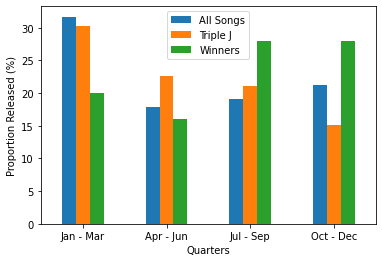

In [27]:
hpt2_spotify_df_qtr.reset_index()
spotify_list = list(hpt2_spotify_df_qtr["name"])
spotify_list = pd.Series(spotify_list/total_songs2*100)

hpt2_df_qtr.reset_index()
triplej_list = list(hpt2_df_qtr["title"])
triplej_list = pd.Series(triplej_list/total_songs*100)

hpt2_winners_df_qtr.reset_index()
winners_list = list(hpt2_winners_df_qtr["title"])
winners_list = pd.Series(winners_list/total_songs1*100)

index = ["Jan - Mar", "Apr - Jun", "Jul - Sep", "Oct - Dec"]

graph_df = pd.DataFrame({"Quarters": index, "All Songs": spotify_list, "Triple J": triplej_list, "Winners": winners_list,})
graph_df = graph_df.set_index("Quarters")
ax = graph_df.plot.bar(rot = 0,)
ax.set_ylabel("Proportion Released (%)")

# Hypothesis 3
What kind of Australian songs do people vote for in the Top 100? We will make a subset of Australian artists and measure their speechiness and Liveness and compare those aggregate values with the rest of the song universe in the historical top 100 list. Hypothesis: Top 100 voters will prefer Aussie songs with higher speechiness and liveness as they will choose songs they've enjoyed live and that showcase similar accents to theirs. The use of single sample t tests to compare the mean of speechiness and liveness to their respective population means will determine if Triple J voters are drawn to these characteristics in Australian songs.

In [28]:
hpt3_df = final_df.copy()
print(hpt3_df["country"].unique())
mean_speechiness = hpt3_df.loc[hpt3_df["country"] == "Australia"]["speechiness"].mean()
ttest_speechiness = st.ttest_1samp(hpt3_df["speechiness"], mean_speechiness)
ttest_speechiness

['USA' 'England' 'Ireland' 'Australia' 'Iceland' 'Sweden' 'Canada'
 'Jamaica' 'Germany' 'Scotland' 'New Zealand' 'France' 'Wales' 'Italy'
 'Denmark' 'Norway' 'Guernsey']


Ttest_1sampResult(statistic=5.287851252325071, pvalue=1.4810478542866405e-07)

Text(0, 0.5, 'Speechiness')

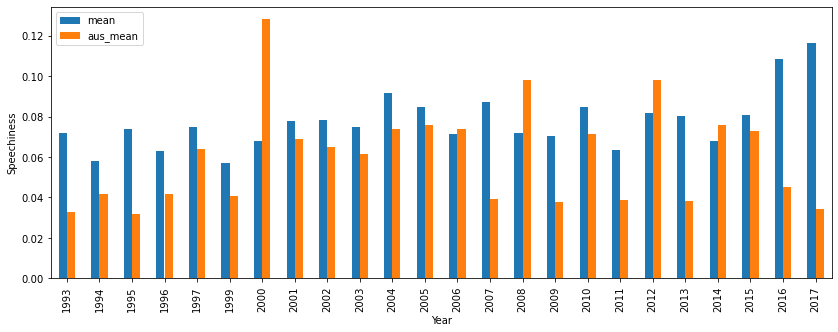

In [29]:
hpt3_aus = hpt3_df.loc[hpt3_df["country"] == "Australia"].groupby("year_x")[["speechiness"]].mean()
hpt3_speech = hpt3_df.groupby("year_x")[["speechiness"]].mean()
hpt3_merge = hpt3_speech.merge(hpt3_aus, left_index=True, right_index=True, how="left")

hpt3_merge.columns = ["mean", "aus_mean"]

# there is no aussie song in 1998, so choose to drop 1998 data or set it to 0
hpt3_dropna = True
if hpt3_dropna:
    hpt3_merge = hpt3_merge.dropna(how="any")
else:
    hpt3_merge = hpt3_merge.fillna(0)

hpt3_merge

ax = hpt3_merge.plot.bar(y=["mean", "aus_mean"], figsize=(14,5))

ax.set_xlabel("Year")
ax.set_ylabel("Speechiness")
#hpt3_speech = hpt3_speech.reset_index()
#hpt3_speech
#hpt3_speech.loc[~hpt3_speech["year_x"].isin(years)]

#hpt3_speech["aus_speechiness"] = hpt3_df.loc[hpt3_df["country"] == "Australia"].groupby("year_x").mean()
#hpt3_speech

Text(0.05, speechiness    0.065042
dtype: float64, '0.065042')

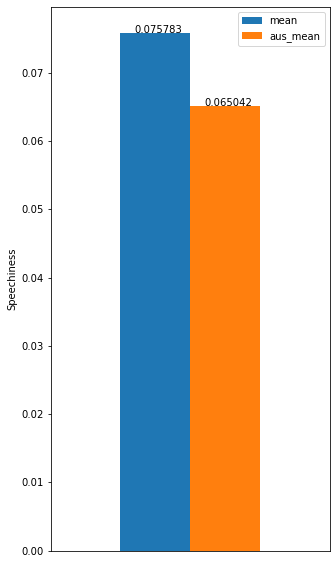

In [37]:
# Speechiness graph w/out years
hpt3_aus = hpt3_df.loc[hpt3_df["country"] == "Australia"][["speechiness"]].mean()
hpt3_ausmean = hpt3_aus.values[0]
hpt3_speech = hpt3_df["speechiness"].mean()
hpt3_merge = pd.DataFrame({"mean": [hpt3_speech],
                          "aus_mean": [hpt3_ausmean]})
ax = hpt3_merge.plot.bar(y=["mean", "aus_mean"], figsize=(5,10), rot = 0)
ax.set_ylabel("Speechiness")
ax.set_xticks([])
ax.text(-0.2, hpt3_speech, str(round(hpt3_speech,6)))
ax.text(0.05, hpt3_aus, str(round(hpt3_ausmean,6)))

# Hypothesis 4
Do Aussies like long songs? We will compare average duration for top 100 songs for each year, against the average duration of all songs released that year. This will tell us if Aussies prefer relatively short songs
A year by year comparison of the average duration of the songs preferred by Aussies (i.e. the Triple J hottest 100 songs) to the population mean of the average duration of all songs released in that year according to Spotify will determine if Aussies like long songs. This analysis will require multiple single sample t-tests to perform.

In [31]:
# use duration_ms column from spotify
hpt4_df = final_df.copy()
hpt4_spotify = df_spotify.copy()
hpt4_df.columns
#hpt4_jjj = hpt4_df[["year", "duration_ms"]]
#hpt4_spotify = spotify_df[[]]

jjj_duration = final_df.groupby("year_x")[["duration_ms"]].mean()
spotify_duration = df_spotify.groupby("year")[["duration_ms"]].mean()

jjj_duration.columns= ["jjj"]
spotify_duration.columns = ["spotify"]

hpt4_merge = jjj_duration.merge(spotify_duration, left_index=True, right_index=True, how="inner")
hpt4_merge

,jjj,spotify
1993,259715.896552,251667.967500
1994,241162.896552,250992.254000
1995,258493.203704,246624.091500
1996,252118.895833,248108.928536
1997,251148.607143,245756.403298
1998,234785.775510,248542.607500
1999,251325.021739,245134.995394
2000,243360.000000,242724.642638
2001,247947.078431,240289.197906
2002,246068.189189,239503.283000


Text(0, 0.5, 'Mean Duration(ms)')

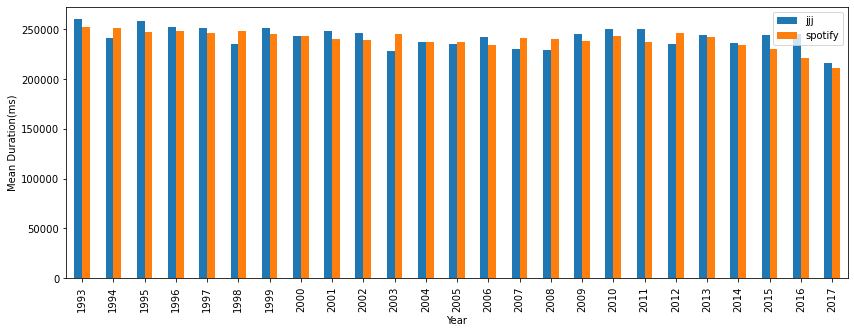

In [32]:
# plot
ax = hpt4_merge.plot.bar(y=["jjj", "spotify"], figsize=(14,5))
ax.set_xlabel("Year")
ax.set_ylabel("Mean Duration(ms)")

In [33]:
# ttest jjj each year durations as sample and spotify year durations as population, multiple 1 sample ttest
ttest_duration = []
for index, row in hpt4_merge.iterrows():
    ttest_duration.append(st.ttest_1samp(hpt4_df.loc[hpt4_df["year_x"] == index]["duration_ms"], row["spotify"]))

ttest_duration

[Ttest_1sampResult(statistic=1.1301860474435765, pvalue=0.2631312609427229),
 Ttest_1sampResult(statistic=-1.2147658835765154, pvalue=0.22946375693976342),
 Ttest_1sampResult(statistic=1.0542332823105596, pvalue=0.2965585447194364),
 Ttest_1sampResult(statistic=0.4686770503327854, pvalue=0.6414670889414187),
 Ttest_1sampResult(statistic=0.610320101620023, pvalue=0.5441635196560693),
 Ttest_1sampResult(statistic=-1.584802725227916, pvalue=0.1195781699512646),
 Ttest_1sampResult(statistic=0.6870090062359433, pvalue=0.49560249573721105),
 Ttest_1sampResult(statistic=0.08646245281458866, pvalue=0.9314661086739842),
 Ttest_1sampResult(statistic=0.8361965052264174, pvalue=0.4070229040742981),
 Ttest_1sampResult(statistic=0.6453669167338888, pvalue=0.5227816706631612),
 Ttest_1sampResult(statistic=-1.908492316803211, pvalue=0.06257914392532797),
 Ttest_1sampResult(statistic=-0.0180523899884051, pvalue=0.9856995789458395),
 Ttest_1sampResult(statistic=-0.20173639954561218, pvalue=0.84114527559

In [34]:
# jjj winner durations as sample and jjj data as population
ttest_duration_winner = st.ttest_1samp(hpt4_df.loc[hpt4_df["position of year"] == 1]["duration_ms"], hpt4_df["duration_ms"].mean())
ttest_duration_winner

Ttest_1sampResult(statistic=-1.0943429995288492, pvalue=0.28466650993819376)